# Housing Prices Prediction Model

## 1. Defining the Question

### a) Specifying the Question

To develop a model that can predict the sale of prices for the Hass Consulting Company

### b) Defining the Metric for Success

We will create a model that will allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### c) Understanding the context

Hass Consulting Limited was formed in 1992. It offers investment-grade developments all over the City. The developments they offer have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.

### d). Recording the Experimental Design

We will use exploratory data analysis, such as Univariate, Bivariate, and Multivariate Analysis, in this study to determine the relationships and differences between different variables. We'll also use Multiple Linear Regression, Quantile Regression, Ridge Regression, Lasso Regression and Elastic Net Regression to make predictions.

### e) Data Relevance


The dataset to use for this project can be found by following this link: http://bit.ly/IndependentProjectWeek7Dataset

Below is the dataset glossary:

* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house

## 2. Reading the Data

In [178]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold



In [179]:
# Let's read our dataset

house = pd.read_csv(r"C:\Users\HP\Desktop\Moringa_School_Projects\CORE\WK7_IP\Independent Project Week 7 - house_data.csv")

## 3. Checking the Data

In [180]:
# Checking the top data

house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [181]:
# Checking the columns

house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [182]:
# Checking the shape

house.shape

(21613, 20)

The dataset contains 20 columns and 21613 rows.

In [183]:
# Describing the data

house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 4. Tidying the Dataset

### a). Checking for Null Values

In [184]:
total = house.isnull().sum().sort_values(ascending=False)
percentage = (house.isnull().sum()/house.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
id,0,0.0
price,0,0.0
sqft_living15,0,0.0
long,0,0.0
lat,0,0.0
zipcode,0,0.0
yr_renovated,0,0.0
yr_built,0,0.0
sqft_basement,0,0.0
sqft_above,0,0.0


From the above, the dataset does not contain any outliers

### b). Checking for Duplicates

In [185]:
house.duplicated().sum()

3

There are 3 duplicates in the dataset and we shall proceed to remove them

In [186]:
house.drop_duplicates(keep='first',inplace=True)

In [187]:
# Confirming
house.duplicated().sum()

0

### c). Checking the Datatypes

In [188]:
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### d). Checking for Outliers

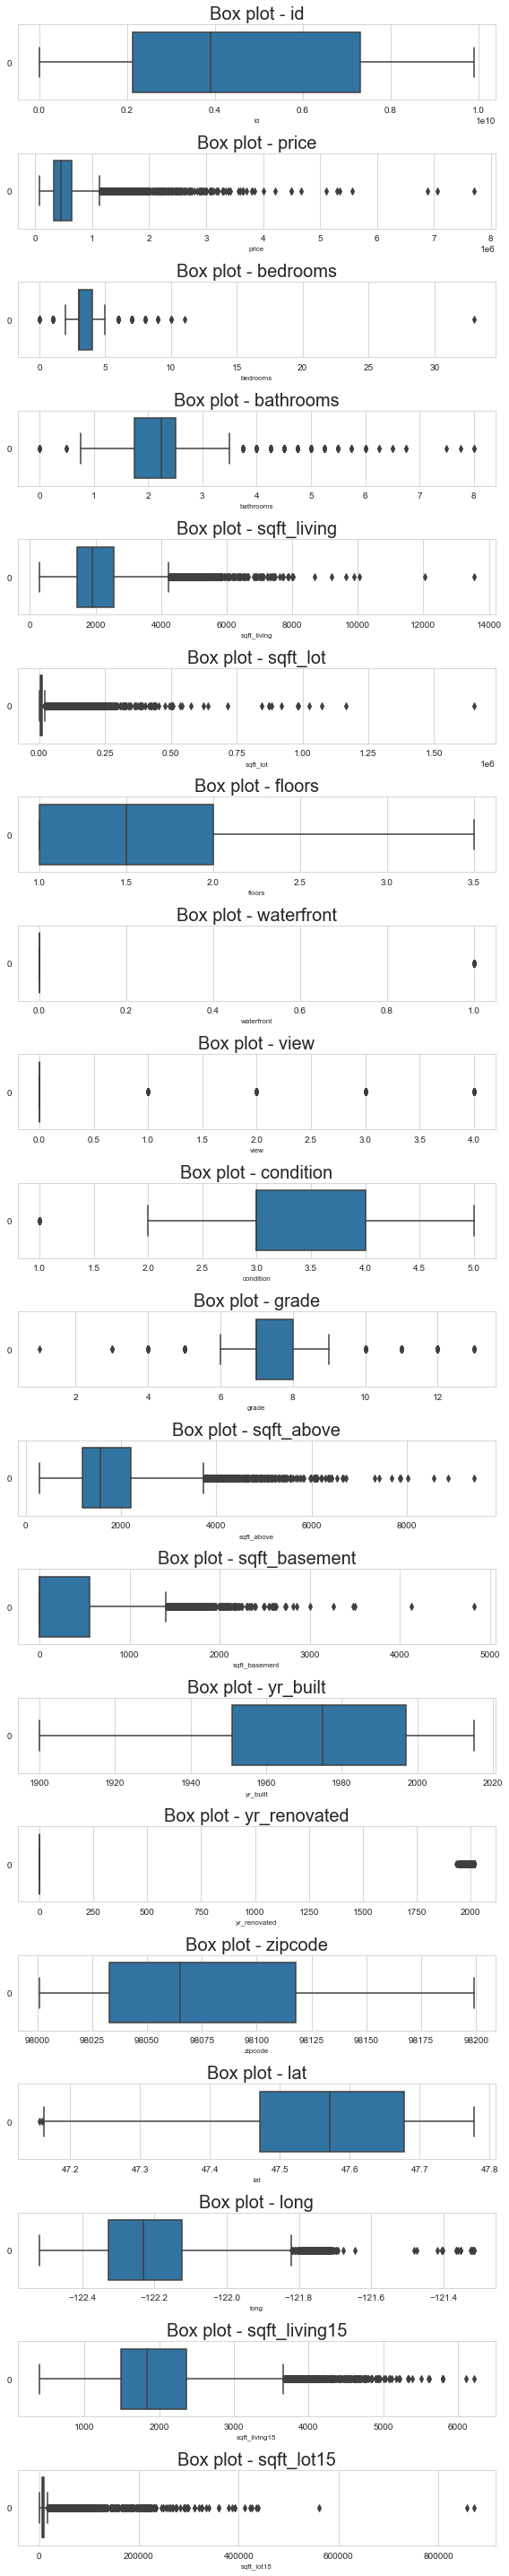

In [189]:
# Plotting columns with numerical values only to check for outliers
col_names = house.columns

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = house[col_val], ax= ax[i], orient="h")
  house[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 20)
  ax[i].set_xlabel(col_val, fontsize= 8)
  
plt.tight_layout()  
plt.show()

In [190]:
# Removing outliers using IQR method
# ---
# Define the outliers range 
Q3 = house[col_names].quantile(0.75)
Q1 = house[col_names].quantile(0.25)
IQR = Q3 - Q1

# Determine the outliers
outliers = house[col_names][((house[col_names] < (Q1 - 1.5 * IQR))
 |(house[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(house))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (6675, 20). Which translates to 30.888477556686716% of the data.


There seems to be very many outliers, if we drop them, the data may not be sufficient for the analysis

## 5. Exploratory Analysis

### a) Univariate Analysis

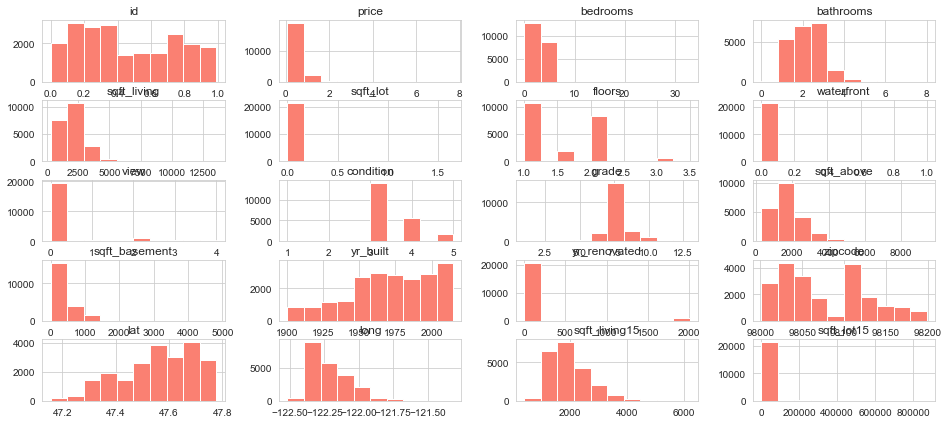

In [191]:
#Plots for data distribution

house.hist(bins=10, figsize=[16,7], color = 'salmon')
plt.show()

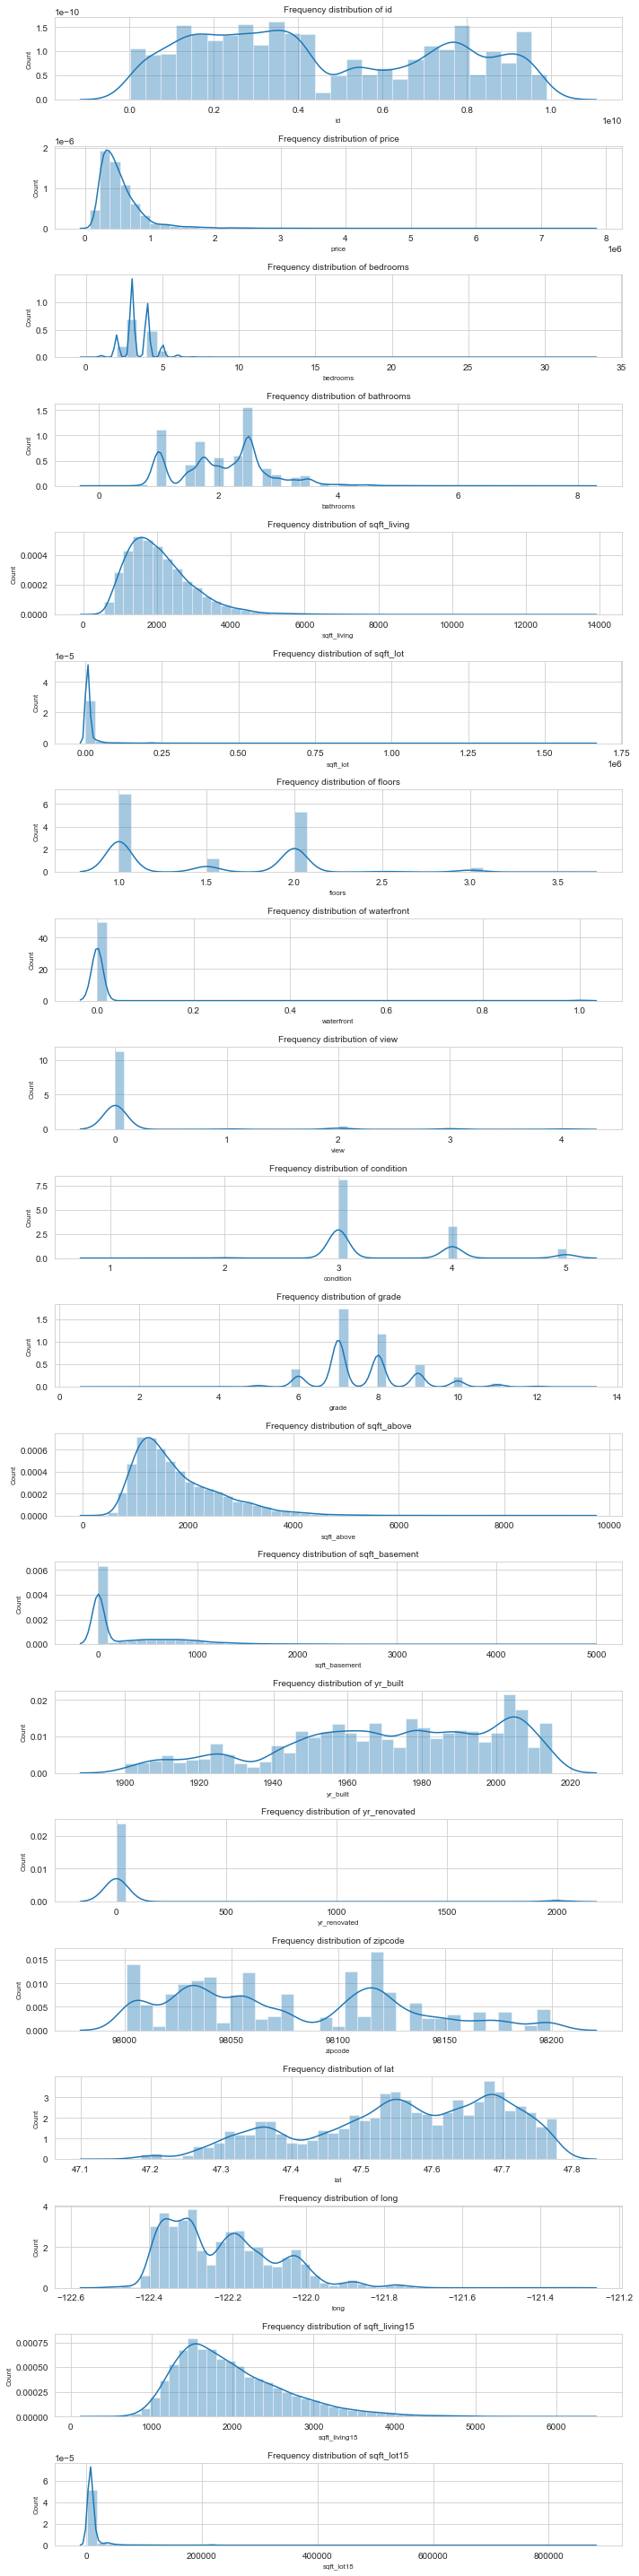

In [192]:
# Plotting distribution of numerical variables

col_names = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(house[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

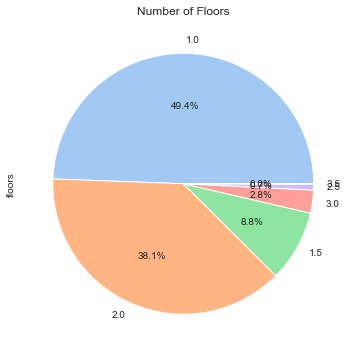

In [193]:
# Pie chart to show the number floors 

colors = sns.color_palette('pastel')[0:5]

house.floors.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (6, 6), colors = colors)
plt.title('Number of Floors')
plt.show()

From the piechart above, we can tell that 1 floor is the most common type

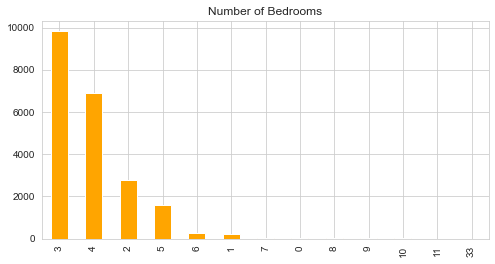

In [194]:
# Bar chart to show the number of bedrooms 

house.bedrooms.value_counts().plot(kind = 'bar', figsize = (8,4), color = 'orange')
plt.title('Number of Bedrooms')
plt.show()

From the above, we can easily see the 3 bedrooms are the most common

### b). Bivariate Analysis

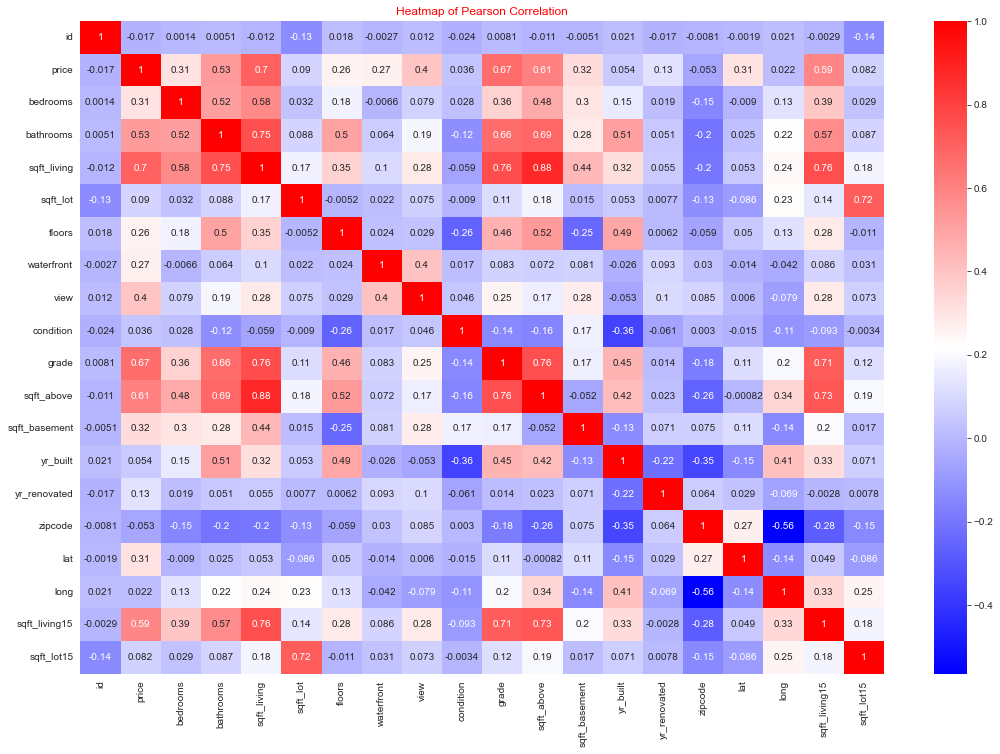

In [195]:
# Checking the Pearson's correlation

sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(18, 12))

sns.heatmap(house.corr(),annot=True,cmap='bwr')
plt.title('Heatmap of Pearson Correlation', color='red')
plt.show()

From the above heatmap, we can note that there is a strong positive correlation between sqft_living(Square feet area of living area) and price

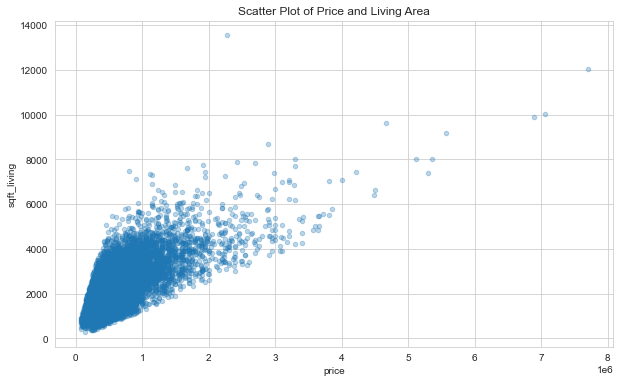

In [196]:
# Scatter plot for the squarefeet area of living area and price

house.plot(kind='scatter', x='price', y='sqft_living', alpha=0.3, figsize=(10,6))
plt.title('Scatter Plot of Price and Living Area')
plt.show()

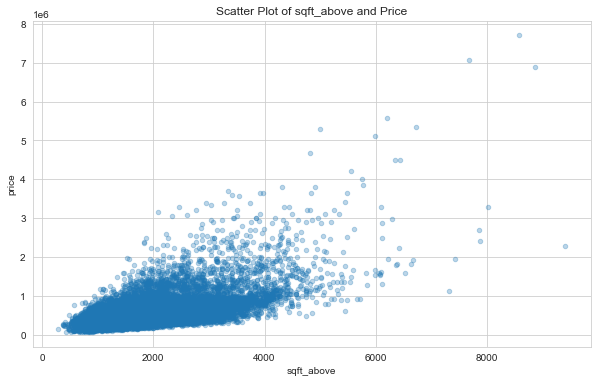

In [197]:
# Scatter plot for the sqft_above and price

house.plot(kind='scatter', x='sqft_above', y='price', alpha=0.3, figsize=(10,6))
plt.title('Scatter Plot of sqft_above and Price')
plt.show()

### c). Multivariate Analysis

#### Principal Component Analysis

In [198]:
# Preparing the data for the model

X = house.drop(['price'],axis=1)
y = house['price']

In [199]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [200]:
#  Normalization

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [201]:
# Applying the PCA with 2 components

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [202]:
# Explaining the Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.27516584, 0.11604472])

It can be seen that first principal component is responsible for 27.51% variance

In [203]:
# Using a multiple linear regression model

regressor = LinearRegression()

y_pred = regressor.fit(X_train, y_train)


In [204]:
# Evaluating the model


print('R-squared: %.2f' % regressor.score(X_test, y_test))

R-squared: 0.59


## 6. Implementing the Solution

### Checking the Multicollinearity

In [205]:
# Correlations between the variables

corr = house.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


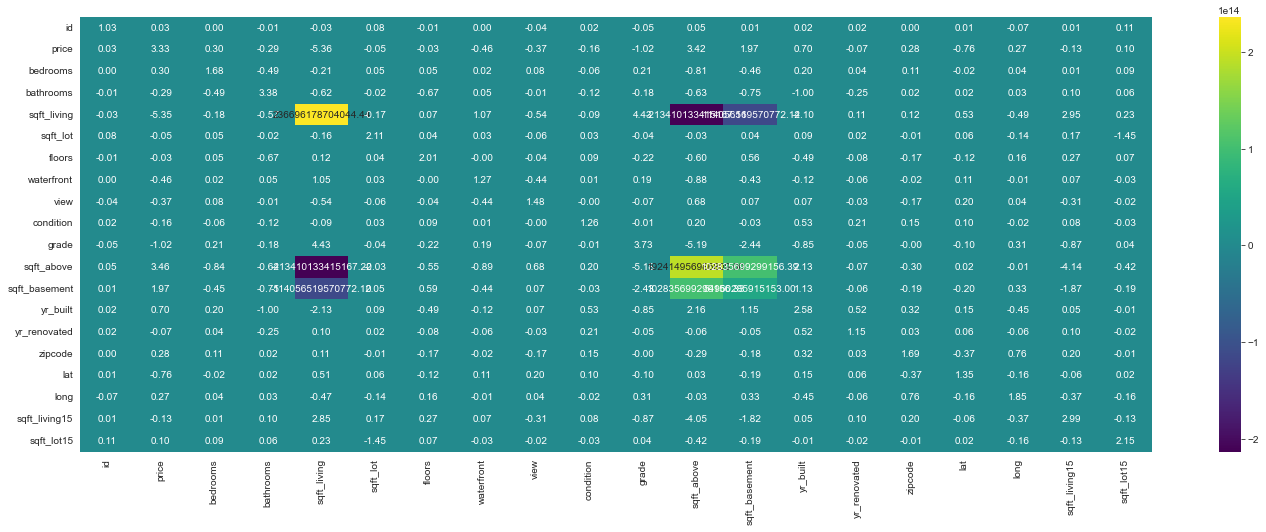

In [206]:
# The heatmap for VIF for the variables

VIF = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

fig, ax = plt.subplots(figsize=(24, 8)) 

sns.heatmap(VIF, annot=True, fmt='.2f', cmap='viridis')
plt.show()

### Multiple Linear Regression


In [207]:
# Creating our X and y variables

X = house.drop(['price'],axis=1)
y = house['price']

In [208]:
# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=73)

In [209]:
# Fitting the model to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [210]:
# Checking the Coefficients

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
id,-6.108549e-07
bedrooms,-3.831723e+04
bathrooms,4.007250e+04
sqft_living,1.112947e+02
sqft_lot,1.300080e-01
floors,1.159646e+04
waterfront,6.289371e+05
view,5.383774e+04
condition,2.704153e+04
grade,9.630948e+04


In [211]:
# Making the predictions

y_pred = regressor.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
18550,630000.0,5.095309e+05
3789,533250.0,3.349963e+05
9106,318500.0,2.432993e+05
12559,545000.0,6.709595e+05
1637,440000.0,3.805499e+05
...,...,...
19454,780000.0,1.149269e+06
7462,245000.0,3.761709e+05
20615,375000.0,5.201077e+05
5497,230000.0,3.167693e+05


In [212]:
# Evaluating the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: ', r2_score(y_test, y_pred))


Mean Absolute Error: 127545.54376368332
Mean Squared Error: 42059657930.25349
Root Mean Squared Error: 205084.51411614064
r2_score:  0.6932546942266149


In [213]:
#We can now make predictions on both the training set & test set and print evaluation metrics RMSE & R2 on both

y_pred_train= regressor.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(r2_score(y_train,y_pred_train ))

y_pred_test= regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print(r2_score(y_test, y_pred_test))

linear_score = r2_score(y_test,y_pred_test)

199732.94316694725
0.7023848357912172
205084.51411614064
0.6932546942266149


The r2 on the train data is 70%, whereas the r2 on the test data is just 69%. The model's performance is good, it can be made better but there is presence of many residual outliers.

### Quantile Regression

In [214]:
# Creating a dataframe for relevant variables

df = house[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [215]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile using the Least Absolute Deviation Model

mod = smf.quantreg('price~ sqft_lot + sqft_lot15 + yr_renovated + sqft_living + sqft_above + sqft_living15 + waterfront+ view + bathrooms', df)
res = mod.fit(q=.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2873
Model:                       QuantReg   Bandwidth:                   3.001e+04
Method:                 Least Squares   Sparsity:                    4.548e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        21:39:12   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6620.2197   5424.395     -1.220      0.222   -1.73e+04    4011.995
sqft_lot          0.0461      0.054      0.856      0.392      -0.060       0.152
sqft_lot15       -0.5856      0.082     -7.132      0.000      -0.747      -0.425
yr_renovated     52.3854      3.894  

In [216]:
# Finding the regression coefficients for the conditioned lower quantile, 0.25 quantile using the Least Absolute Deviation Model

mod = smf.quantreg('price~ sqft_lot + sqft_lot15 + yr_renovated + sqft_living + sqft_above + sqft_living15 + waterfront+ view + bathrooms', df)
res = mod.fit(q=.25)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2250
Model:                       QuantReg   Bandwidth:                   2.684e+04
Method:                 Least Squares   Sparsity:                    4.145e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        21:39:16   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.819e+04   3962.147     -4.590      0.000    -2.6e+04   -1.04e+04
sqft_lot          0.1161      0.045      2.591      0.010       0.028       0.204
sqft_lot15       -0.1662      0.064     -2.586      0.010      -0.292      -0.040
yr_renovated     29.3261      3.020  

In [217]:
# Finding the regression coefficients for the conditioned Upper quantile, 0.75 quantile using the Least Absolute Deviation Model

mod = smf.quantreg('price~ sqft_lot + sqft_lot15 + yr_renovated + sqft_living + sqft_above + sqft_living15 + waterfront+ view + bathrooms', df)
res = mod.fit(q=.75)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3661
Model:                       QuantReg   Bandwidth:                   2.687e+04
Method:                 Least Squares   Sparsity:                    5.908e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21610
Time:                        21:39:19   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.376e+04   6404.443      9.955      0.000    5.12e+04    7.63e+04
sqft_lot          0.1131      0.070      1.625      0.104      -0.023       0.250
sqft_lot15       -0.8093      0.112     -7.233      0.000      -1.029      -0.590
yr_renovated     72.4091      4.374  

We can conclude from the above quantile regression that the model was good. The median,lower and upper quantile have a Pseudo R-Squared
within 0.2 and 0.4 which is considered a good model

### Ridge Regression

The loss function is modified in this case to reduce the model's complexity by introducing a penalty parameter equal to the square of the coefficients' magnitude.

In [ ]:
r = Ridge(alpha=0.01)
r.fit(X_train, y_train) 
pred_train_rr= r.predict(X_train)
print("Mean_squared_error_train: ",np.sqrt(mean_squared_error(y_train, pred_train_rr)))
print("r2_score_train: ",r2_score(y_train, pred_train_rr))

pred_test_rr= r.predict(X_test)
print("Mean_squared_error_test: ", np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("r2_score_test: ",r2_score(y_test, pred_test_rr))

Mean_squared_error_train:  199732.94326626408
r2_score_train:  0.7023848354952402
Mean_squared_error_test:  205084.23899558658
r2_score_test:  0.6932555172227561


### Lasso Regression

The loss function in Lasso is changed to reduce the model's complexity by limiting the sum of the absolute values of the model coefficients.

In [ ]:
# We shall use Alpha = 0.01 for Lasso Regression

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Mean_squared_error_train: ",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("r2_score_train: ",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("Mean_squared_error_test: ",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("r2_score_test: ",r2_score(y_test, pred_test_lasso))

Mean_squared_error_train:  199732.94316702394
r2_score_train:  0.7023848357909888
Mean_squared_error_test:  205084.50817584572
r2_score_test:  0.6932547119964358


### Elastic Net Regression

Elastic Net Regression combines both Ridge and Lasso regression. Here, the R2 is the least of all models but by a very negligible margin. Hence the worst performing model.

In [ ]:
model_elnet = ElasticNet(alpha = 0.01)
model_elnet.fit(X_train, y_train) 
pred_train_enet= model_elnet.predict(X_train)
print("Mean_squared_error_train: ",np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("r2_score_train: ",r2_score(y_train, pred_train_enet))

pred_test_enet= model_elnet.predict(X_test)
print("Mean_squared_error_test: ",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("r2_score_test: ",r2_score(y_test, pred_test_enet))

Mean_squared_error_train:  201849.7347584702
r2_score_train:  0.6960430915128927
Mean_squared_error_test:  206103.26038077453
r2_score_test:  0.6901996435963212


#### Scores for the models

In [171]:
models_score = dict(Linear_Score_PCA = linear_score,
                    Ridge_Score = r.score(X_test,y_test),
                    Lasso_Score = model_lasso.score(X_test,y_test),
                    ElasticNet_Score = model_elnet.score(X_test,y_test))
scores = pd.DataFrame.from_dict(models_score,orient='index')
scores.reset_index(level=0 ,inplace= True)

scores.columns = ['Models','Model_score']
scores

,Models,Model_score
0,Linear_Score_PCA,0.693255
1,Ridge_Score,0.693256
2,Lasso_Score,0.693255
3,ElasticNet_Score,0.690200


## 7. Conclusion and Recommendation

The appropriate prediction model for the housing prices is the Lasso Model. This is because this model would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

The variables that greatly affect the prices are bathrooms, square feet of the living area, square feet above and the grades of the houses. As a result, when determining or forecasting the prices of the residences they should consider these.

## 8. Follow up questions

### a) Did we have the right data?

Yes, the dataset available for this analysis was relevant to the research problem.

### b) Do we need other data to answer the research question?

No, the dataset provided had relevant information for the research question.

### c) Did we have the right question?


Yes, the research question was simple and specific enough.